In [77]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


def calculate_distance(x1,y1,x2,y2):
     dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
     return round(dist)

results = pd.read_csv("Results/studyResults_39582_corinna.csv", encoding="utf-8")
results["TimeFromRailToTarget"] = results["Time"] - results["TimeToRail"]
results["DistanceToTarget"] = results.apply(lambda r: calculate_distance(r["TargetX"], r["TargetY"], r["StartX"], r["StartY"]), axis=1)

key_condition = "Condition"
#key_condition = "GuideLength"


def ttest_all_pairs(groups, attr):
    """

    Parameters
    ----------
    groups
    attr

    Returns
    -------

    """
    for n1, g1 in groups:
        for n2, g2 in groups:
            if n1 != n2:
                tset, pval = ttest_ind(g1[attr], g2[attr])
                print('p-values %s vs. %s: %1.2f' % (str(n1), str(n2), pval))


def plot_combined_histogram(groups, attr, bins, xlabel, ylabel):
    fig, ax1 = plt.subplots(figsize=[12,10])
    ax1.hist([group[attr] for _, group in groups],
             bins=bins,
             label=[name for name, _ in groups])
    ax1.set_xticks(bins)
    ax1.legend()
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    plt.show()



# Finding an object in the middle of the room: Evaluation

## 1. Target acquisition time

__Hypothesis__:
The target acquisition time for haptic guidance would be significantly faster than without guidance but not as fast as in the gravity (force field) condition.

### Raw completion times to trial indices

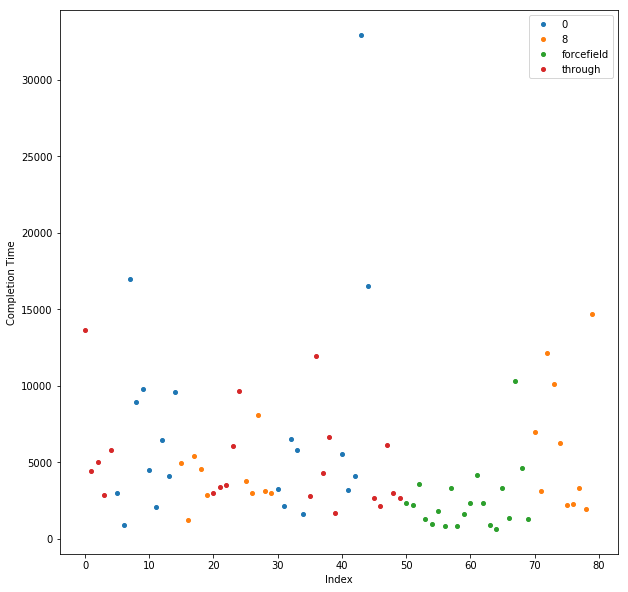

In [64]:
completion_times = results.loc[:, ["Time", key_condition]]
completion_times_grouped = completion_times.groupby(key_condition)

fig, ax = plt.subplots(figsize=(10,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in completion_times_grouped:
    group = group.reset_index()
    ax.set_xlabel("Index")
    ax.set_ylabel("Completion Time")
    ax.plot(group["index"], group["Time"], marker='.', linestyle='', ms=8, label=name)
ax.legend()
plt.show()

### Histograms for raw completion times

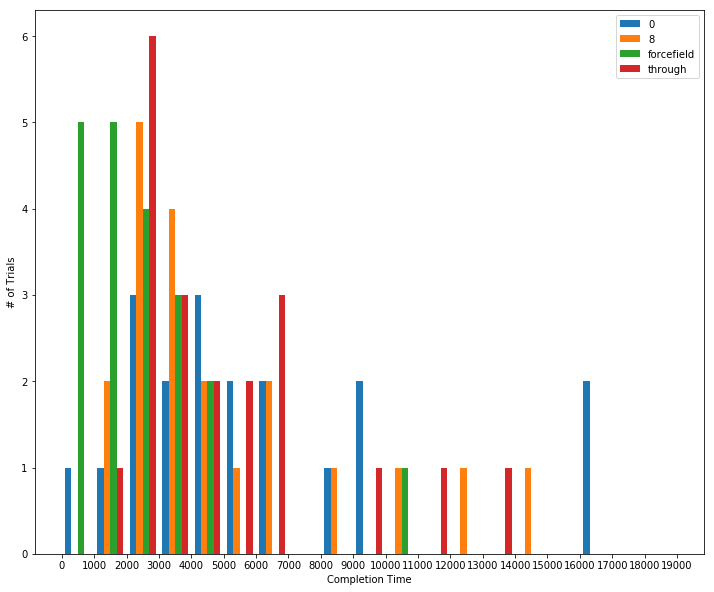

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12da8ce90>,
      dtype=object)

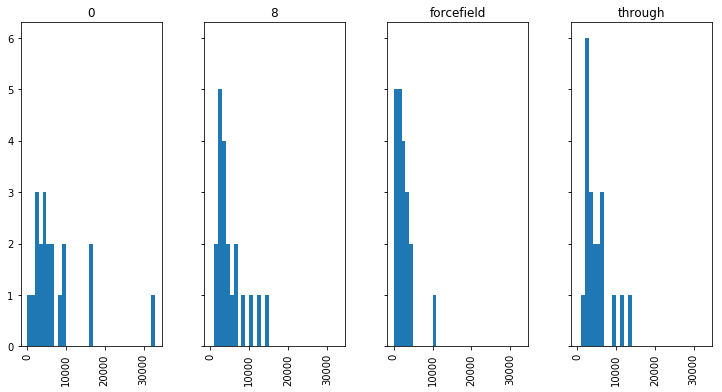

In [78]:
max_completion_time = results["Time"].max()
bins = range(0,20000,1000)
plot_combined_histogram(completion_times_grouped, "Time", bins, "Completion Time", "# of Trials")

completion_times.hist(by=key_condition, column="Time", layout=[1,4], figsize=[12,6], sharex=True, sharey=True, bins=range(0,int(math.ceil(max_completion_time))+1000,1000))


### Mean completion times per condition

In [51]:
print("Mean completion times")
print(completion_times.groupby(key_condition).mean())
print("Std. dev for completion times")
print(completion_times.groupby(key_condition).std())

Mean completion times
               Time
Condition          
0           7372.30
8           5139.05
forcefield  2487.10
through     5060.00
Std. dev for completion times
                   Time
Condition              
0           7483.739166
8           3616.940820
forcefield  2182.412255
through     3277.786448


Are there significant differences?

In [52]:
ttest_all_pairs(completion_times_grouped, "Time")

p-values 0 vs. 8: 0.24
p-values 0 vs. forcefield: 0.01
p-values 0 vs. through: 0.21
p-values 8 vs. 0: 0.24
p-values 8 vs. forcefield: 0.01
p-values 8 vs. through: 0.94
p-values forcefield vs. 0: 0.01
p-values forcefield vs. 8: 0.01
p-values forcefield vs. through: 0.01
p-values through vs. 0: 0.21
p-values through vs. 8: 0.94
p-values through vs. forcefield: 0.01


## 2. Sense of Agency

__Hypothesis__:
The sense of agency perceived by participants would be stronger with haptic guidance than for the gravity condition and weaker than without guidance.

Metrics:
1. Mean agency per condition
2. Ratio of intentionally found targets to the number of trials per condition

### Histogram of responses to the "agency" question

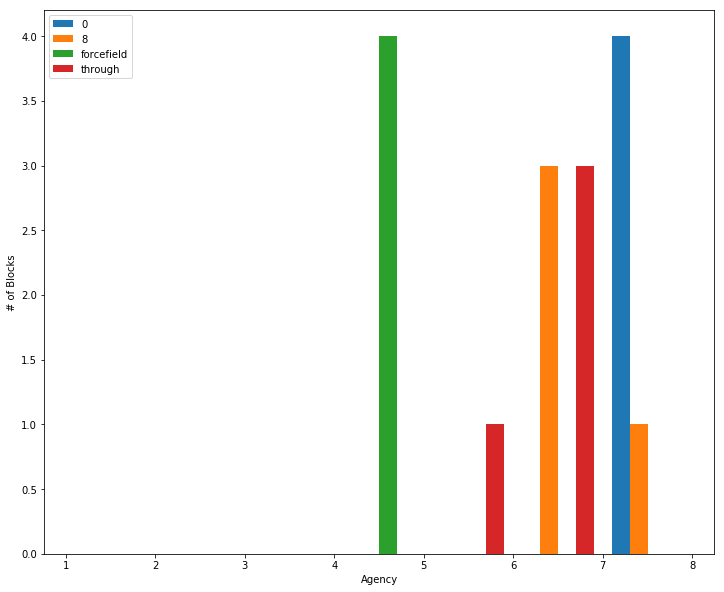

In [82]:
bins = range(1,9)
questions_grouped = results.groupby([key_condition, "BlockId"]).max().groupby(key_condition)
plot_combined_histogram(questions_grouped, "Agency", bins, "Agency", "# of Blocks")


Are there significant differences?

In [83]:
ttest_all_pairs(questions_grouped, "Agency")

p-values 0 vs. 8: 0.02
p-values 0 vs. forcefield: 0.00
p-values 0 vs. through: 0.00
p-values 8 vs. 0: 0.02
p-values 8 vs. forcefield: 0.00
p-values 8 vs. through: 0.21
p-values forcefield vs. 0: 0.00
p-values forcefield vs. 8: 0.00
p-values forcefield vs. through: 0.00
p-values through vs. 0: 0.00
p-values through vs. 8: 0.21
p-values through vs. forcefield: 0.00



### How often did the participants intentionally approach the target (in %)?

            FoundTarget
Condition              
0                  0.10
8                  0.60
forcefield         0.85
through            0.80


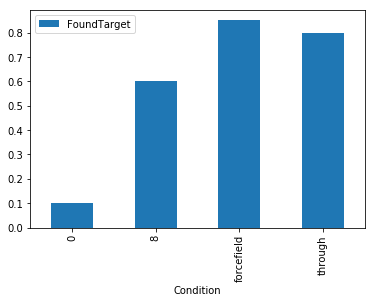

In [75]:
targets_found = results.loc[results["FoundTarget"]==True].loc[:, ["FoundTarget", key_condition]].groupby(key_condition).count()
trials_per_group = results.groupby(key_condition).count().max()[0]
targets_found_percent = targets_found.apply(lambda x: x/trials_per_group)
targets_found_percent.plot(kind="bar")
print(targets_found_percent)

## 3. Easiness

How does guidance affect how easy a task is?

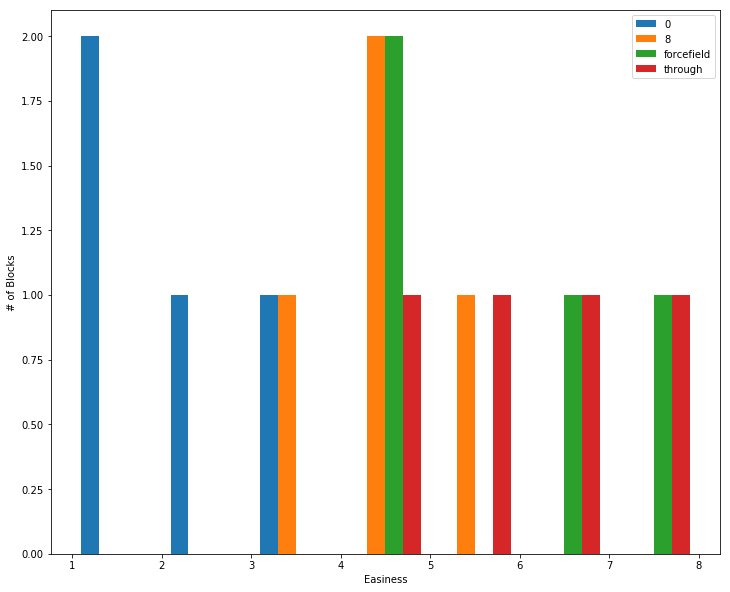

Easiness mean
            Easiness
Condition           
0               1.75
8               4.00
forcefield      5.25
through         5.50
Easiness std
            Easiness
Condition           
0           0.850696
8           0.725476
forcefield  1.332785
through     1.147079


In [87]:
bins = range(1,9)

plot_combined_histogram(questions_grouped, "Easiness", bins, "Easiness", "# of Blocks")

easiness_grouped = results.loc[:, ["Easiness", key_condition]].groupby(key_condition)
print("Easiness mean")
print(easiness_grouped.mean())
print("Easiness std")
print(easiness_grouped.std())

Are there significant differences (easiness)?

In [88]:
ttest_all_pairs(questions_grouped, "Easiness")

p-values 0 vs. 8: 0.01
p-values 0 vs. forcefield: 0.01
p-values 0 vs. through: 0.00
p-values 8 vs. 0: 0.01
p-values 8 vs. forcefield: 0.19
p-values 8 vs. through: 0.10
p-values forcefield vs. 0: 0.01
p-values forcefield vs. 8: 0.19
p-values forcefield vs. through: 0.81
p-values through vs. 0: 0.00
p-values through vs. 8: 0.10
p-values through vs. forcefield: 0.81


## 4. Helpfulness

How much credit goes to the system for finding the target?

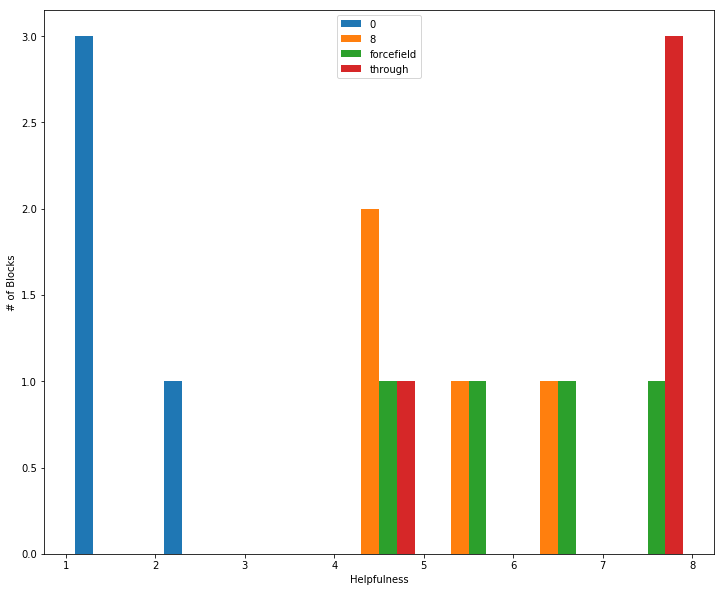

Helpfulness mean
            Helpfulness
Condition              
0                  1.25
8                  4.75
forcefield         5.50
through            6.25
Helpfulness std
            Helpfulness
Condition              
0              0.444262
8              0.850696
forcefield     1.147079
through        1.332785


In [89]:
bins = range(1,9)

plot_combined_histogram(questions_grouped, "Helpfulness", bins, "Helpfulness", "# of Blocks")

helpfulness_grouped = results.loc[:, ["Helpfulness", key_condition]].groupby(key_condition)
print("Helpfulness mean")
print(helpfulness_grouped.mean())
print("Helpfulness std")
print(helpfulness_grouped.std())

Are there significant differences (helpfulness)?

In [90]:
ttest_all_pairs(questions_grouped, "Helpfulness")

p-values 0 vs. 8: 0.00
p-values 0 vs. forcefield: 0.00
p-values 0 vs. through: 0.00
p-values 8 vs. 0: 0.00
p-values 8 vs. forcefield: 0.39
p-values 8 vs. through: 0.14
p-values forcefield vs. 0: 0.00
p-values forcefield vs. 8: 0.39
p-values forcefield vs. through: 0.48
p-values through vs. 0: 0.00
p-values through vs. 8: 0.14
p-values through vs. forcefield: 0.48


How much time of the task is spent on the crossing task (ratio "time to rail"/"completion time")

             TimeToRail
GuideLength            
0                  -1.0
8                3298.7
16                831.3
              TimeToRail
GuideLength             
0               0.000000
8            2609.607615
16            419.980714


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112110450>,
      dtype=object)

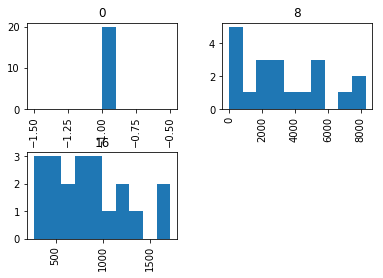

In [26]:
results["TimeRailToTargetPercent"]

print(results.loc[:, ["TimeToRail", "Time", key_condition]].groupby(key_condition).agg())
print(results.loc[:, ["TimeToRail", "GuideLength"]].groupby("GuideLength").std())
results.hist(by="GuideLength", column="TimeToRail")
#results.loc[results["GuideLength"]==8, ["TimeToRail"]]

             TimeFromRailToTarget
GuideLength                      
0                          6058.0
8                          2170.9
16                         2254.7
             TimeFromRailToTarget
GuideLength                      
0                     3082.563151
8                     1795.772137
16                    2696.269764


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1122c70d0>,
      dtype=object)

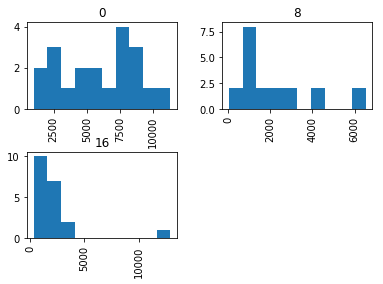

In [27]:
print(results.loc[:, ["TimeFromRailToTarget", "GuideLength"]].groupby("GuideLength").mean())
print(results.loc[:, ["TimeFromRailToTarget", "GuideLength"]].groupby("GuideLength").std())
results.hist(by="GuideLength", column="TimeFromRailToTarget")

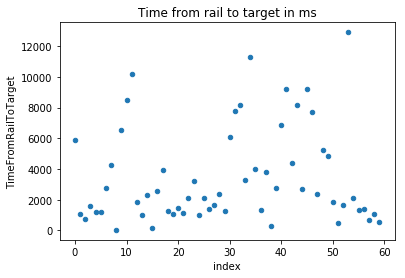

In [29]:
results.reset_index().plot(kind="scatter", x="index", y="TimeFromRailToTarget", title="Time from rail to target in ms")

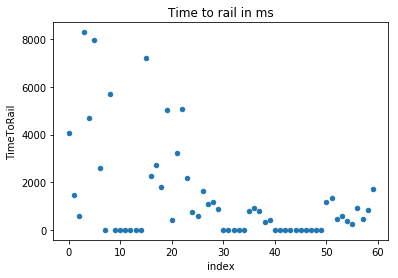

In [30]:
results.reset_index().plot(x="index", y="TimeToRail", kind="scatter", title="Time to rail in ms")


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1125dee10>,
      dtype=object)

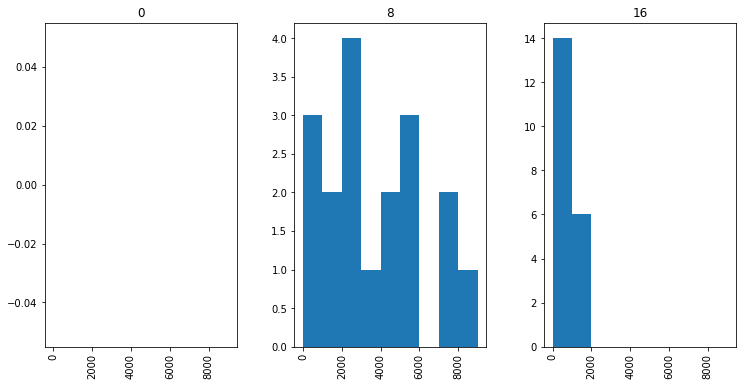

In [31]:
results.hist(by="GuideLength", column="TimeToRail", layout=[1,3], figsize=[12,6], sharex=True, bins=range(0,10000, 1000))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x112764bd0>,
      dtype=object)

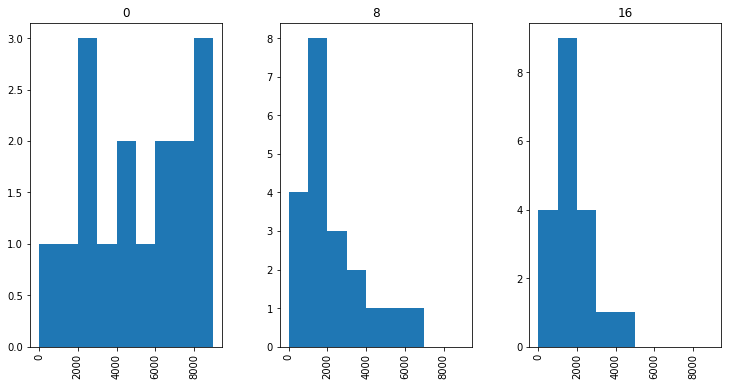

In [32]:
results.hist(by="GuideLength", column="TimeFromRailToTarget", layout=[1,3], figsize=[12,6], sharex=True, bins=range(0,10000, 1000))

                         Time
DistanceToTarget             
5.0               4384.700000
10.0              5357.033333
                         Time
DistanceToTarget             
5.0               3025.492826
10.0              2982.685049


array([<matplotlib.axes._subplots.AxesSubplot object at 0x112b10d10>,
      dtype=object)

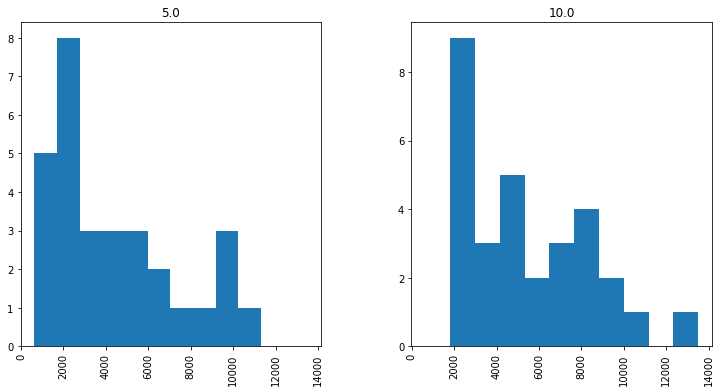

In [43]:
print(results.loc[:, ["Time", "DistanceToTarget"]].groupby("DistanceToTarget").mean())
print(results.loc[:, ["Time", "DistanceToTarget"]].groupby("DistanceToTarget").std())
results.hist(by="DistanceToTarget", column="Time", layout=[1,2], figsize=[12,6], sharex=True)